In [6]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install ace_tools

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip3 install openpyxl
raw_data = pd.read_excel('CASE DETAILS/Coffee Shop Sales.xlsx')
raw_data.head()

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [8]:
# Listing unique values
print("Unique values in store loc:", raw_data['store_location'].unique())
print("Unique values in prod category:", raw_data['product_category'].unique())
print("Unique values in prod type:", raw_data['product_type'].unique())

Unique values in store loc: ['Lower Manhattan' "Hell's Kitchen" 'Astoria']
Unique values in prod category: ['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
Unique values in prod type: ['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [10]:
raw_data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [12]:
raw_data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [15]:
raw_data.columns.unique()

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

## Descriptive analytics

In [16]:
## Product sales numbers
raw_data['product_category'].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

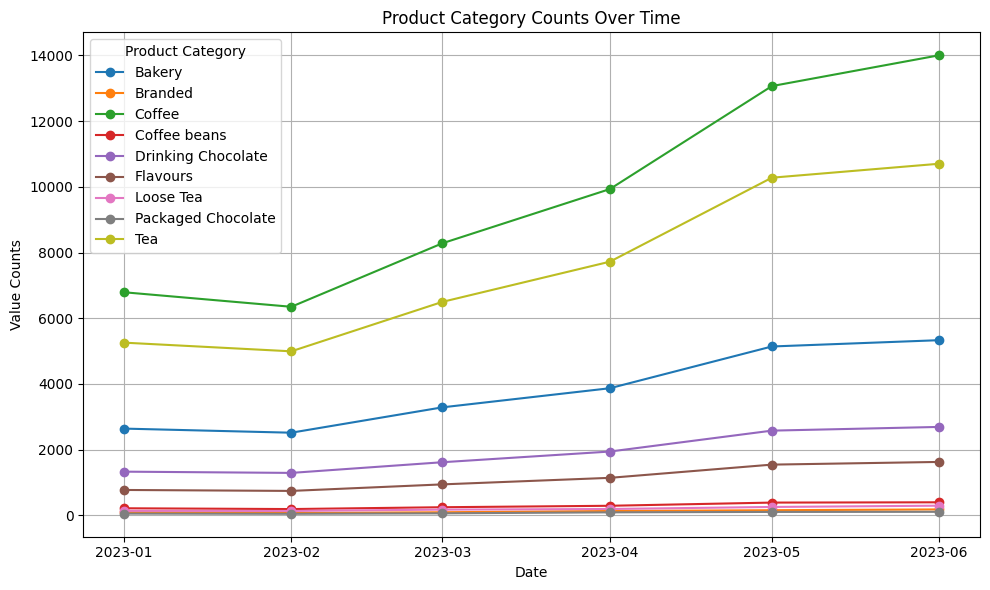

In [21]:
# Extract Year-Month and convert to Timestamp for plotting
df = raw_data.copy()
df['Year_Month'] = df['transaction_date'].dt.to_period('M').dt.to_timestamp()

# Group by 'Year_Month' and 'Product_Category' and count
category_counts = df.groupby(['Year_Month', 'product_category']).size().reset_index(name='Count')

# Pivot the DataFrame for plotting
pivot_df = category_counts.pivot(index='Year_Month', columns='product_category', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
for category in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[category], marker='o', label=category)

plt.xlabel('Date')
plt.ylabel('Value Counts')
plt.title('Product Category Counts Over Time')
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
unique_products_df = raw_data[['product_category', 'unit_price']].drop_duplicates().reset_index(drop=True)
print(unique_products_df)

      product_category  unit_price
0               Coffee        3.00
1                  Tea        3.10
2   Drinking Chocolate        4.50
3               Coffee        2.00
4               Bakery        3.00
5               Coffee        4.25
6   Drinking Chocolate        3.50
7                  Tea        2.55
8               Coffee        3.50
9                  Tea        3.00
10              Bakery        3.75
11                 Tea        2.50
12  Drinking Chocolate        4.75
13              Bakery        3.25
14              Coffee        3.75
15              Bakery        3.50
16              Coffee        2.50
17                 Tea        4.00
18  Drinking Chocolate        3.75
19              Bakery        4.50
20              Coffee        2.20
21              Coffee        2.45
22              Coffee        3.10
23            Flavours        0.80
24           Loose Tea        8.95
25        Coffee beans       21.00
26        Coffee beans       28.00
27  Packaged Chocola

In [9]:
# Load the dataset
file_path = 'CASE DETAILS/Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path, sheet_name='Transactions')

# Calculate total revenue per transaction
df['transaction_revenue'] = df['transaction_qty'] * df['unit_price']

# Aggregate revenue by store
store_revenue = df.groupby(['store_id', 'store_location']).agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()

# Rename columns for clarity
store_revenue.rename(columns={
    'transaction_revenue': 'total_revenue',
    'transaction_id': 'total_transactions',
    'transaction_qty': 'total_quantity'
}, inplace=True)

# Calculate average revenue per transaction
store_revenue['avg_revenue_per_transaction'] = store_revenue['total_revenue'] / store_revenue['total_transactions']

# Sort stores by total revenue
top_stores = store_revenue.sort_values(by='total_revenue', ascending=False)

# Identify top-performing stores
print("Top Performing Stores by Revenue:")
print(top_stores)

Top Performing Stores by Revenue:
   store_id   store_location  total_revenue  total_transactions  \
2         8   Hell's Kitchen      236511.17               50735   
0         3          Astoria      232243.91               50599   
1         5  Lower Manhattan      230057.25               47782   

   total_quantity  avg_revenue_per_transaction  
2           71737                     4.661696  
0           70991                     4.589891  
1           71742                     4.814726  


In [10]:
# --- Product Sales & Pricing Optimization ---
# Aggregate revenue and quantity by product category and type
product_performance = df.groupby(['product_category', 'product_type']).agg({
    'transaction_revenue': 'sum',
    'transaction_qty': 'sum',
    'transaction_id': 'nunique'
}).reset_index()

# Calculate average revenue per transaction for products
product_performance['avg_revenue_per_transaction'] = product_performance['transaction_revenue'] / product_performance['transaction_id']

# Display top-performing products by revenue
print("Top Product Performance:")
print(product_performance.sort_values(by='transaction_revenue', ascending=False))

Top Product Performance:
      product_category           product_type  transaction_revenue  \
5               Coffee       Barista Espresso             91406.20   
26                 Tea        Brewed Chai tea             77081.95   
16  Drinking Chocolate          Hot chocolate             72416.00   
7               Coffee  Gourmet brewed coffee             70034.60   
25                 Tea       Brewed Black tea             47932.00   
28                 Tea      Brewed herbal tea             47539.50   
9               Coffee  Premium brewed coffee             38781.15   
8               Coffee  Organic brewed coffee             37746.50   
2               Bakery                  Scone             36866.12   
6               Coffee            Drip coffee             31984.00   
1               Bakery                 Pastry             25655.99   
27                 Tea       Brewed Green tea             23852.50   
0               Bakery               Biscotti             19793.5

In [11]:
# --- Time-based Sales Trends ---
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract month and day for analysis
df['month'] = df['transaction_date'].dt.to_period('M')
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Monthly sales trends
monthly_sales = df.groupby('month').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
print("Monthly Sales Trends:")
print(monthly_sales)

# Day of week sales trends
day_sales = df.groupby('day_of_week').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
print("Day of Week Sales Trends:")
print(day_sales)

Monthly Sales Trends:
     month  transaction_revenue  transaction_id  transaction_qty
0  2023-01             81677.74           17314            24870
1  2023-02             76145.19           16359            23550
2  2023-03             98834.68           21229            30406
3  2023-04            118941.08           25335            36469
4  2023-05            156727.76           33527            48233
5  2023-06            166485.88           35352            50942
Day of Week Sales Trends:
  day_of_week  transaction_revenue  transaction_id  transaction_qty
0      Friday            101373.00           21701            31207
1      Monday            101677.28           21643            31231
2    Saturday             96894.48           20510            29614
3      Sunday             98330.31           21096            30182
4    Thursday            100767.78           21654            31162
5     Tuesday             99455.94           21202            30449
6   Wednesday        

In [12]:
# --- Average Sales per Transaction ---
avg_sales_per_transaction = df.groupby('product_type').agg({
    'transaction_revenue': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
}).reset_index()
avg_sales_per_transaction['avg_revenue'] = avg_sales_per_transaction['transaction_revenue'] / avg_sales_per_transaction['transaction_id']
avg_sales_per_transaction['avg_quantity'] = avg_sales_per_transaction['transaction_qty'] / avg_sales_per_transaction['transaction_id']
print("Average Sales per Transaction:")
print(avg_sales_per_transaction)

Average Sales per Transaction:
             product_type  transaction_revenue  transaction_id  \
0        Barista Espresso             91406.20           16403   
1                Biscotti             19793.53            5711   
2               Black tea              2711.85             303   
3        Brewed Black tea             47932.00           11350   
4         Brewed Chai tea             77081.95           17183   
5        Brewed Green tea             23852.50            5671   
6       Brewed herbal tea             47539.50           11245   
7                Chai tea              4301.25             443   
8                Clothing              6163.00             221   
9      Drinking Chocolate              2728.04             266   
10            Drip coffee             31984.00            8477   
11         Espresso Beans              5560.25             319   
12          Gourmet Beans              6798.00             366   
13  Gourmet brewed coffee             70034.6